# Homework project | Reinforcement Learning | Maryam Rahbaralam



## Question 1:


For simplicity, the expression for $
\pi_{\theta}(a | x)
$:
$$
\pi_{\theta}(a | x)=\frac{\exp \left(\theta^{\top} \phi(x, a)\right)}{\sum_{b} \exp \left(\theta^{\top} \phi\left(x, b\right)\right)}=\frac{A}{B}
$$
Also, to compute $
\nabla_{\theta} \log \pi_{\theta}(a | x)
$ , so I'll go ahead and do that. We differentiate $
\log \pi_{\theta}(a | x)
$ with respect to the parameters, $\theta$:
$$
\nabla_{\theta} \log \pi_{\theta}(a | x)=\nabla_{\theta} \log \frac{A}{B}=\nabla_{\theta} \log A-\nabla_{\theta} \log B
$$
$$
=\nabla_{\theta}\left[\theta^{\top} \phi(x, a)\right]-\nabla_{\theta}\left[\log \sum_{b} \exp \left(\theta^{\top} \phi\left(x, b\right)\right)\right]
$$
$$
=\phi(x, a)-\frac{1}{\sum_b} \exp \left(\theta^{\top} \phi\left(x, b\right)\right) \sum_{b} \exp \left(\theta^{\top} \phi(x, b)\right) \phi(x, b)
$$
$$
=\phi(x, a)-\sum_{b} \frac{\exp \left(\theta^{\top} \phi(x, b)\right)}{\sum_{a^{\prime}} \exp \left(\theta^{\top} \phi\left(x, a^{\prime}\right)\right)} \phi(x, b)
$$
$$
=\phi(x, a)-\sum_{b} \pi(x, b, \theta) \phi(x, b)
$$
herefore, we can write:
$$
\nabla_{\theta} \log \pi_{\theta}(a | x)=\phi(x, a)-\sum_{b} \pi(x, b, \theta) \phi(x, b)
$$

# Question 2:

## Question 2.1: 
How  does  the  choice  of $\gamma$ influence  the  behavior  of  thealgorithm?
The discount factor $\gamma$ affects how much weight it gives to future rewards in the value function. A discount factor $\gamma= 0$ will result in state/action values representing the immediate reward, while a higher discount factor $\gamma= 0.9$ will result in the values representing the cumulative discounted future reward an agent expects to receive (behaving under a given policy).

The convergence is influenced by the discount factor depending on whether it’s a continual task or an episodic one. In a continual one, $\gamma$ must be between $[0,1)$, whereas an episodic one it can be between $
[0,1]$.

## Question 2.2: 

In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import math

Let $\pi_{\theta}$ be a parametrized
stochastic policy with $\pi_{\theta}(a | x)$ being the probability of taking action a in state
x. In particular, consider the policy
$$
\pi_{\theta}(a | x)=\frac{e^{\theta^{\top} \phi(x, a)}}{\sum_{b \in \mathcal{A}} e^{\theta^{\top} \phi(x, b)}}
$$

In [3]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [4]:
class grad_bandit:
    
    def __init__(self, k, alpha, Delta, iters, mu='random'):
        # Number of arms
        self.k = k
        self.actions = np.arange(k)
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        # Initialize preferences
        self.H = np.zeros(k)
        # Learning rate
        self.alpha = alpha
        self.Detla = Delta
        self.a1 = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-0.99, k)
            
    def softmax(self):

        #self.prob_action = np.array([0.5 - Delta, 0.5 + Delta])
        #print(self.prob_action)
        p1 = 0.5 - Delta
        p2 = 0.5 + Delta
        self.prob_action = np.array([p1, p2])
        
    def pull(self):
        # Update probabilities
        self.softmax()
        
        # Select highest preference action
        a = np.random.choice(self.actions, p=self.prob_action)
   
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]
        
        # Update preferences
        self.H[a] = self.H[a] + \
            self.alpha * (reward - self.mean_reward) * (1 - self.prob_action[a])
        actions_not_taken = self.actions!=a
        self.H[actions_not_taken] = self.H[actions_not_taken] - \
            self.alpha * (reward - self.mean_reward) * self.prob_action[actions_not_taken]
            
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self, mu=None):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(self.k)
        self.H = np.zeros(self.k)
        if mu == 'random':
            self.mu = np.random.normal(0, 1, self.k)

In [5]:
def rewards(alpha, episodes, iters, Delta, k):
    grad = grad_bandit(k, alpha, Delta, iters, mu='random')
    grad_rewards = np.zeros(iters)
    opt_grad = 0
    opt_ucb = 0
    H = np.zeros(iters)
    actions = np.arange(k)
    # Run experiments
    for i in range(episodes):
        # Reset counts and rewards
        grad.reset('random')
    
        # Run experiments
        grad.run()
       
        # Update long-term averages
        grad_rewards = grad_rewards + (grad.reward - grad_rewards) / (i + 1)
    
        # Count optimal actions
        opt_grad += grad.k_n[np.argmax(grad.mu)]
        
        grad.pull()
        a = np.random.choice(actions, p = prob_action)
        
        H = H[a] + alpha * (grad.reward - grad.mean_reward) * (1 - grad.prob_action[a])
        #print(H)
    return grad_rewards, opt_grad, H

### Fix $\gamma=0.99 \text { and } \Delta=0.05$, and consider the step sizes
$$
\begin{array}{l}{\bullet \alpha_{k}=c / \sqrt{k}} \\ {\bullet \alpha_{k}=c / k, \text { and }} \\ {\bullet \alpha_{k}=c / k^{2}}\end{array}
$$
### for various choices of c. Plot $\pi_{\theta_{k}}\left(a_{2} | x\right) \text { as a function of } k:
$

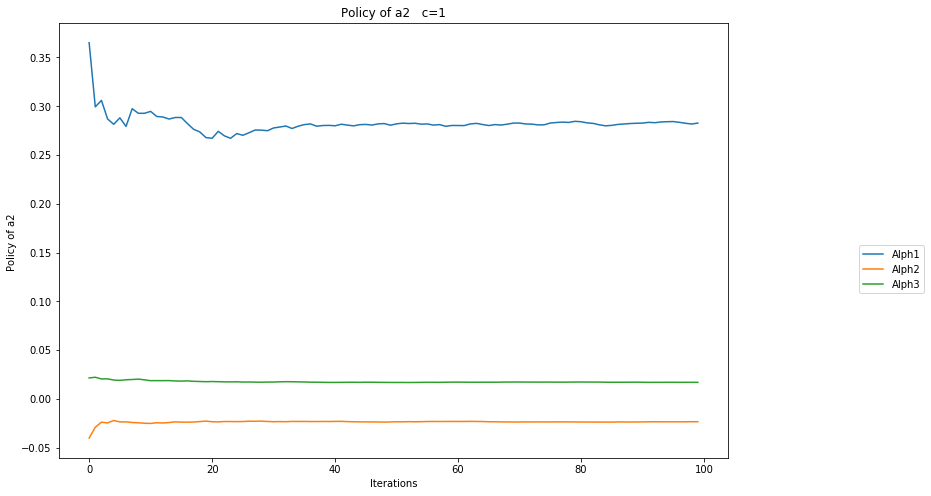

In [248]:
c= 1
k = 2
iters = 100
episodes = 100
Delta = 0.05
#consider Different step sizes
alpha1 = c/math.sqrt(iters)
alpha2 = c/ iters
alpha3 = c/(iters^2)

# Initialize bandits
grad_rewards1, opt_grad1, H1 = rewards(alpha1, episodes, iters, Delta, k)
grad_rewards2, opt_grad2, H2 = rewards(alpha2, episodes, iters, Delta, k)
grad_rewards3, opt_grad3, H3 = rewards(alpha3, episodes, iters, Delta, k)

plt.figure(figsize=(12,8))
plt.plot(H1, label="Alph1")
plt.plot(H2, label="Alph2")
plt.plot(H3, label="Alph3")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Policy of a2 ")
plt.title("Policy of a2 " + "  c=" + str(c))
plt.show()

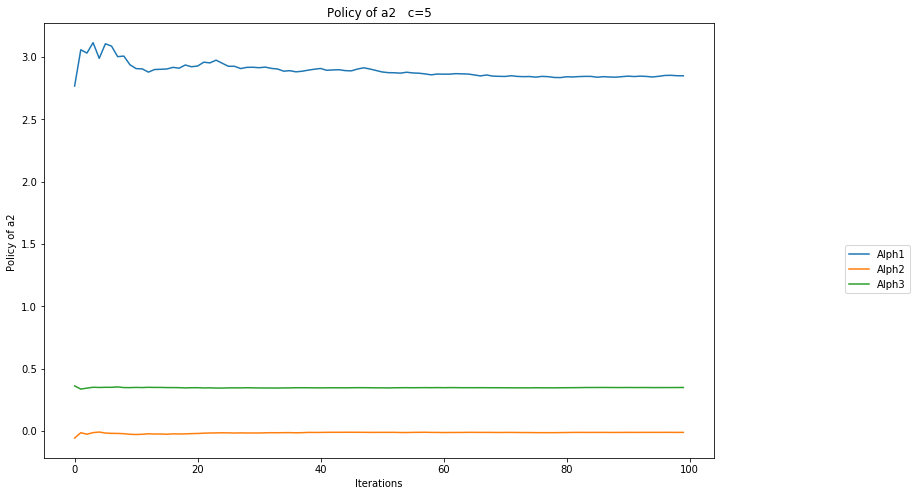

In [249]:
c= 5
k = 2
iters = 100
episodes = 100
Delta = 0.05
#consider Different step sizes
alpha1 = c/math.sqrt(iters)
alpha2 = c/ iters
alpha3 = c/(iters^2)

# Initialize bandits
grad_rewards1, opt_grad1, H1 = rewards(alpha1, episodes, iters, Delta, k)
grad_rewards2, opt_grad2, H2 = rewards(alpha2, episodes, iters, Delta, k)
grad_rewards3, opt_grad3, H3 = rewards(alpha3, episodes, iters, Delta, k)

plt.figure(figsize=(12,8))
plt.plot(H1, label="Alph1")
plt.plot(H2, label="Alph2")
plt.plot(H3, label="Alph3")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Policy of a2 ")
plt.title("Policy of a2 " + "  c=" + str(c))
plt.show()

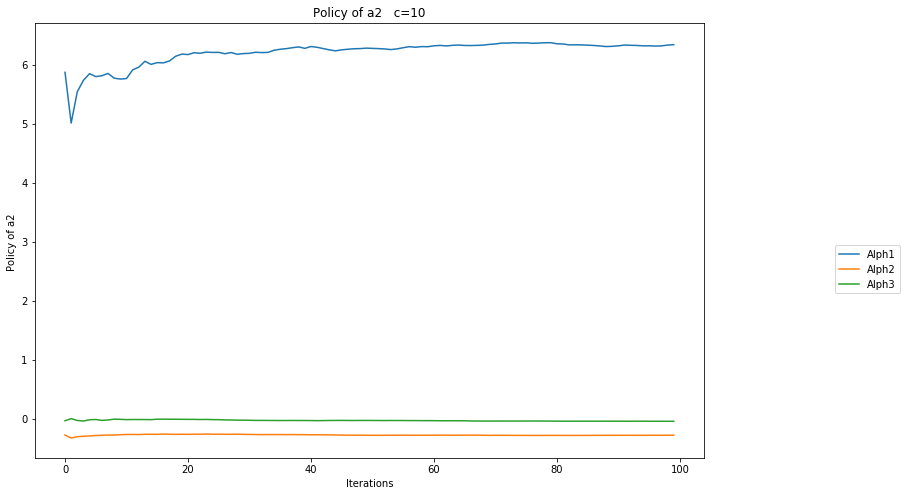

In [251]:
c= 10
k = 2
iters = 100
episodes = 100
Delta = 0.05
#consider Different step sizes
alpha1 = c/math.sqrt(iters)
alpha2 = c/ iters
alpha3 = c/(iters^2)

# Initialize bandits
grad_rewards1, opt_grad1, H1 = rewards(alpha1, episodes, iters, Delta, k)
grad_rewards2, opt_grad2, H2 = rewards(alpha2, episodes, iters, Delta, k)
grad_rewards3, opt_grad3, H3 = rewards(alpha3, episodes, iters, Delta, k)

plt.figure(figsize=(12,8))
plt.plot(H1, label="Alph1")
plt.plot(H2, label="Alph2")
plt.plot(H3, label="Alph3")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Policy of a2 ")
plt.title("Policy of a2 " + "  c=" + str(c))
plt.show()

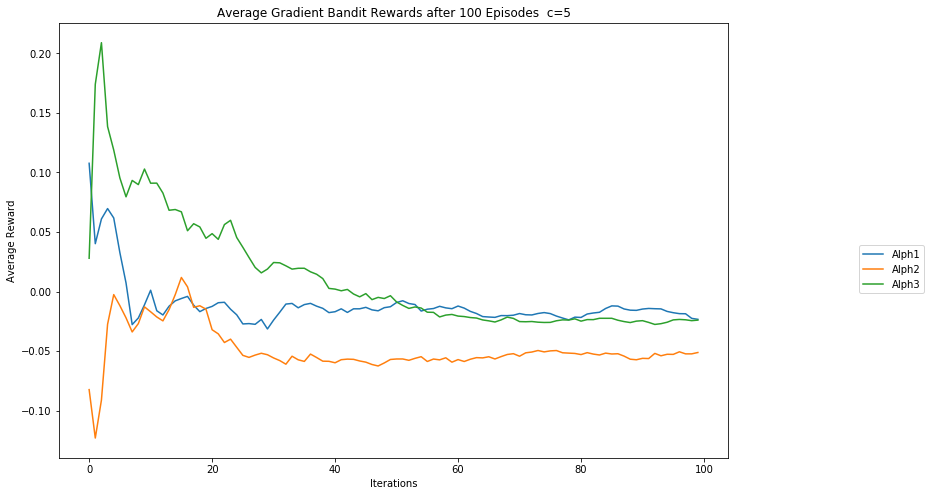

In [42]:
c= 5
k = 2
iters = 100
episodes = 100
Delta = 0.05
#consider Different step sizes
alpha1 = c/math.sqrt(iters)
alpha2 = c/ iters
alpha3 = c/(iters^2)

# Initialize bandits
grad_rewards1, opt_grad1 = rewards(alpha1, episodes, iters, Delta, k)
grad_rewards2, opt_grad2 = rewards(alpha2, episodes, iters, Delta, k)
grad_rewards3, opt_grad3 = rewards(alpha3, episodes, iters, Delta, k)

plt.figure(figsize=(12,8))
plt.plot(grad_rewards1, label="Alph1")
plt.plot(grad_rewards2, label="Alph2")
plt.plot(grad_rewards3, label="Alph3")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Gradient Bandit Rewards after " 
          + str(episodes) + " Episodes" + "  c=" + str(c))
plt.show()

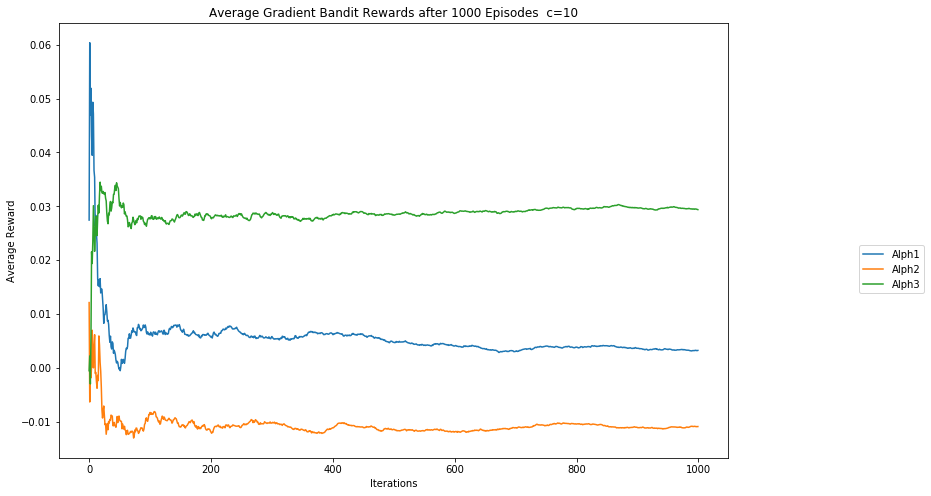

In [33]:
c= 10
k = 2
iters = 1000
episodes = 1000
Delta = 0.05
#consider Different step sizes
alpha1 = c/math.sqrt(iters)
alpha2 = c/ iters
alpha3 = c/(iters^2)

# Initialize bandits
grad_rewards1, opt_grad1 = rewards(alpha1, episodes, iters, Delta, k)
grad_rewards2, opt_grad2 = rewards(alpha2, episodes, iters, Delta, k)
grad_rewards3, opt_grad3 = rewards(alpha3, episodes, iters, Delta, k)

plt.figure(figsize=(12,8))
plt.plot(grad_rewards1, label="Alph1")
plt.plot(grad_rewards2, label="Alph2")
plt.plot(grad_rewards3, label="Alph3")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Gradient Bandit Rewards after " 
          + str(episodes) + " Episodes" + "  c="+ str(c))
plt.show()

### Question 2.3: Pick the best of these step sizes and plot $\pi_{\theta_{k}}\left(a_{2} | x\right)$ 
### as a function of $k \text { for } \Delta \in\{0.01,0.05,0.1,0.5\}$

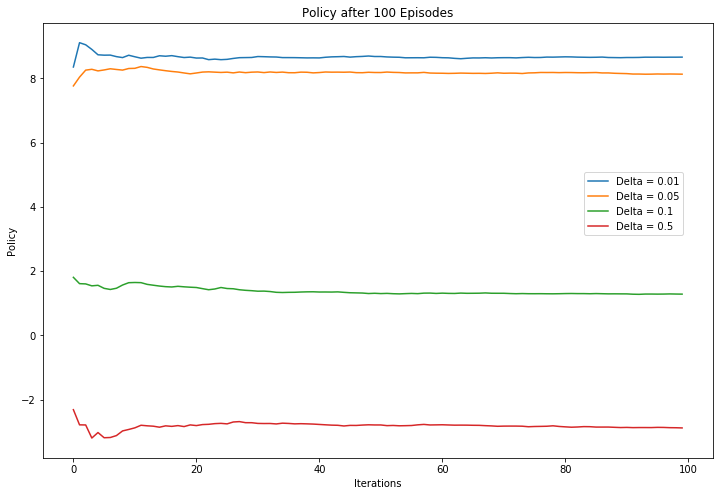

In [279]:
Delta1 = 0.01
Delta2 = 0.05
Delta3 = 0.1
Delta4 = 0.5

alpha = c/math.sqrt(iters)
#alpha = c/ iters
#alpha = c/(iters^2)



# Initialize bandits
grad_rewards1, opt_grad1, H1 = rewards(alpha, episodes, iters, Delta1, k)
grad_rewards2, opt_grad2, H2 = rewards(alpha, episodes, iters, Delta2, k)
grad_rewards3, opt_grad3, H3 = rewards(alpha, episodes, iters, Delta3, k)
grad_rewards4, opt_grad4, H4 = rewards(alpha, episodes, iters, Delta4, k)


plt.figure(figsize=(12,8))
plt.plot(H1, label="Delta = 0.01")
plt.plot(H2, label="Delta = 0.05")
plt.plot(H3, label="Delta = 0.1")
plt.plot(H4, label="Delta = 0.5")
plt.legend(bbox_to_anchor=(0.8, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Policy")
plt.title("Policy after " 
          + str(episodes) + " Episodes")
plt.show()